
# Using K-Nearest Neighbor to Classify Parkinson's, REM Sleep Behavior Disorder, and Healthy Controls Based on Speech and Voice Parameters


## Background
This project aims to utilize a KNN model to cases of Parkinson's, REM sleep behavior disorder, and healthy control based on 20+ speech and voice parameters. 
### About speech and voice characteristics of Parkinson's and REM Sleep Behavior Disorder
Parkinson's Disease (PD) and REM Sleep Behavior Disorder (RBD) are both neurological conditions that can impact speech and voice characteristics. 

- In Parkinson's, individuals often experience a reduction in voice volume, a monotonous pitch, and a breathy or hoarse voice quality, commonly referred to as **hypokinetic dysarthria**. These changes are due to the rigidity and reduced movement of muscles involved in speech production. 
- RBD, characterized by the loss of muscle atonia during REM sleep leading to physical movements, has been associated with changes in voice and speech that can include variations in tone and a strained vocal quality.

Interestingly, RBD is often considered a precursor to neurodegenerative disorders like Parkinson's. Studies indicate that many individuals diagnosed with RBD may develop Parkinson's Disease or related conditions later in life, suggesting a potential progressive link between the two disorders affecting the central nervous system, which could manifest in overlapping speech and voice symptoms. This relationship highlights the importance of monitoring vocal changes in individuals with RBD as potential early indicators of Parkinson’s Disease.

<p align="center">
    <img src="2365307_orig.png" width="600">
</p>

## Data Description
The dataset consists of 20+ speech, voice, and repiration-related parameters measured in connected speech. Here are some examples:

- **Duration of unvoiced stops**:Duration of unvoiced stops refers to the length of time that vocal tract obstructions are maintained during the production of unvoiced consonants such as "p", "t", and "k". This measure is important in speech analysis because variations can indicate articulatory and phonetic differences, potentially reflecting speech disorders or accents.
- **Gaping in-between voiced intervals**:Gaping between voiced intervals refers to the pauses or breaks that occur between periods of voiced speech. This can manifest as silence or as segments filled with breathy or unvoiced sounds, and the duration and frequency of these gaps can provide insight into speech fluency and potential voice disorders.



## The Dataset

The dataset includes 30 patients with early untreated Parkinson’s disease (PD), 50 patients with REM sleep behavior disorder (RBD) who are at high risk of developing Parkinson’s disease or other synucleinopathies, and 50 healthy controls (HC). All patients were scored clinically by a well-trained professional neurologist with experience in movement disorders. All subjects were examined during a single session with a speech specialist. All subjects performed readings of standardized, phonetically-balanced texts of 80 words and a monologue about their interests, job, family, or current activities for approximately 90 seconds. Speech features were automatically analyzed by Hlavnička et al. (2017).

Dataset Source: [Early biomarkers of Parkinson’s disease based on natural connected speech](https://archive.ics.uci.edu/dataset/392/early+biomarkers+of+parkinson+s+disease+based+on+natural+connected+speech)

---
## The Model - KNN
### KNN

The k-nearest neighbors (KNN) model is a non-parametric algorithm used for classification and regression tasks. It operates by comparing a given data point with its k closest neighbors in the feature space to determine its classification or predict a value based on the majority or average of those neighbors. The choice of k and the distance metric used are critical to the model's performance and accuracy.

### Principal Component Analysis (PCA)

PCA is a statistical technique used in machine learning to reduce the dimensionality of large datasets while preserving as much variance as possible. It works by identifying the directions, called principal components, along which the variance of the data is maximized. This is useful for simplifying the data, improving algorithm efficiency, and removing noise or redundant features.

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme()

df = pd.read_csv('PD_biomarker_dataset.csv', delimiter=',')
df.dataframeName = 'PD_biomarker_dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

df.head(5)

There are 130 rows and 28 columns


,Participant code,Diagnosis,Age (years),Gender,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced\nintervals (-/min),...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
0,PD01,PD,58,F,1.564,354,6.05,146,264,58.65,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,PD,68,F,1.564,340,27.52,173,253,48.26,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,PD,68,M,1.550,211,11.97,377,322,47.54,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,PD,75,M,1.519,140,-2.49,360,663,13.72,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,PD,61,M,1.543,269,6.72,211,328,42.90,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [19]:
#PCA

X = df.iloc[:, 4:].to_numpy()
y = df['Diagnosis'].to_numpy()


scaled_X = preprocessing.scale(X)
pca = PCA()
X_pca = pca.fit_transform(scaled_X)
print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")
per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.29000596 0.09826728 0.08094975 0.07530047 0.06877929 0.05499734
 0.04846556 0.04077125 0.03834511 0.03020356 0.02811729 0.02661318
 0.02342777 0.01735106 0.01481407 0.01398427 0.01132215 0.00942112
 0.00708782 0.00637064 0.00542901 0.00478952 0.00419492 0.00099161]
per_var = [29.    9.83  8.09  7.53  6.88  5.5   4.85  4.08  3.83  3.02  2.81  2.66
  2.34  1.74  1.48  1.4   1.13  0.94  0.71  0.64  0.54  0.48  0.42  0.1 ] 



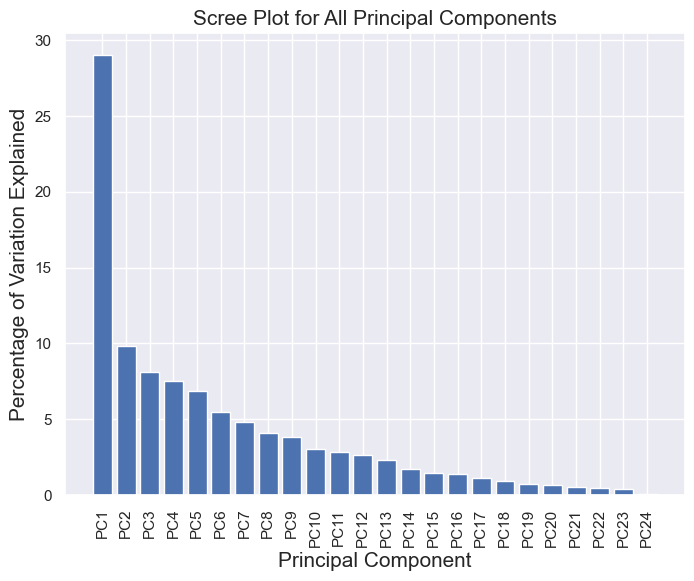

In [20]:
# Extracting explained variance ratios and preparing the Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, 2)
labels = [f"PC{i+1}" for i in range(len(per_var))]

# Plotting all principal components
plt.figure(figsize=(8, 6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.xlabel('Principal Component', fontsize=15)
plt.ylabel('Percentage of Variation Explained', fontsize=15)
plt.title('Scree Plot for All Principal Components', fontsize=15)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

Classification Report:
              precision    recall  f1-score   support

          HC       0.55      0.92      0.69        13
          PD       0.00      0.00      0.00        11
         RBD       0.50      0.53      0.52        15

    accuracy                           0.51        39
   macro avg       0.35      0.49      0.40        39
weighted avg       0.37      0.51      0.43        39



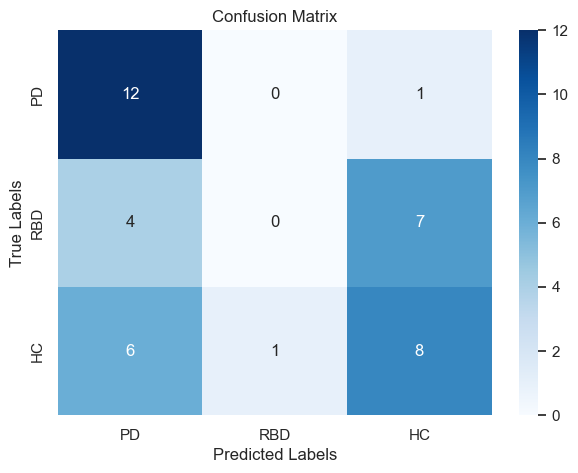

In [23]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize and train classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['PD', 'RBD', 'HC'], yticklabels=['PD', 'RBD', 'HC'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



### Observation 
Several different values of K were tested, and the current K showed the highest accuracy, yet the results are still unsatisfactory. This underperformance could stem from multiple factors
- The dataset is imbalanced, with uneven numbers of patients across the three categories (30 PD, 50 RBD, and 50 HC). This imbalance can lead to biased classifier performance.
- The PCA may not be good choice. It might be discarding information that is crucial for distinguishing between these specific classes.
- Given that RBD is often a precursor to PD, the parameters for these conditions might exhibit similar trends.

let's combine PD cases with the RBD cases given their similar trends and remove PCA.

In [9]:
# Combine PD and RBD into one category 'PDRBD'
df['Diagnosis'].replace(['PD', 'RBD'], 'PDRBD', inplace=True)

Classification Report:
              precision    recall  f1-score   support

          HC       0.64      0.54      0.58        13
       PDRBD       0.79      0.85      0.81        26

    accuracy                           0.74        39
   macro avg       0.71      0.69      0.70        39
weighted avg       0.74      0.74      0.74        39



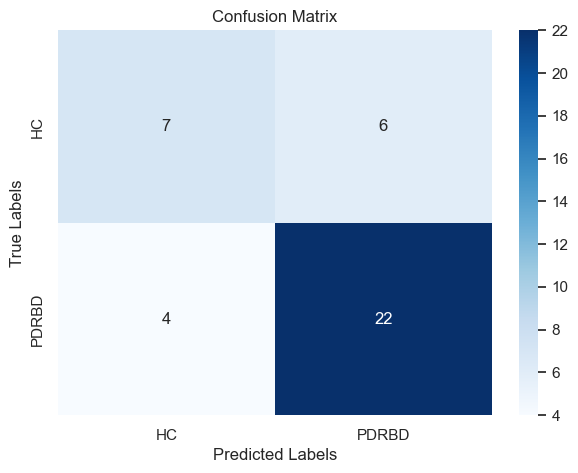

In [11]:
X = df.iloc[:, 4:].to_numpy()
y = df['Diagnosis'].to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Initialize KNN with a reasonable number of neighbors; you may tune this number based on your validation results
knn = KNeighborsClassifier(n_neighbors=9)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Conclustion 
The final model achieved a significant improvement in accuracy, increasing from an initial 51% to 74% after tuning. However, for a diagnostic tool, this level of accuracy still falls short of clinical reliability. The complexity of the problem or a potential mismatch between the model capabilities and the task at hand could be contributing factors. Additionally, the presence of outliers might be distorting the classification boundaries, which suggests that further refinement or a different modeling approach may be necessary to enhance performance.

Hlavnika,J., Tykalov,T., Onka,K., Rika,E., Rusz,J., and J.,J.. (2017). Early biomarkers of Parkinson’s disease based on natural connected speech. UCI Machine Learning Repository. https://doi.org/10.24432/C5W02Q.